# Breast Cancer Classification using Neural Networks

This Jupyter Notebook demonstrates the process of building a neural network model to classify breast cancer data.


## Importing Necessary Libraries

- NumPy, Pandas, Matplotlib: Handling data and visualization
- sklearn.datasets: Loading the breast cancer dataset
- train_test_split: Splitting the dataset into training and testing sets
- StandardScaler: Scaling the features
- TensorFlow and Keras: Building and training the neural network


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

## Loading and Exploring the Dataset

The breast cancer dataset is loaded using `sklearn.datasets.load_breast_cancer()`. The data is then converted into a Pandas DataFrame for exploration.


In [2]:
# Load the breast cancer dataset from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

## Data Preprocessing and Exploration

- Features and labels are separated.
- Basic statistics and information about the dataset are displayed.


In [3]:
# Display information about the dataset
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
# Create a DataFrame from the dataset
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Add the target labels to the DataFrame
data_frame["label"] = breast_cancer_dataset.target
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [6]:
# Explore the shape and basic information of the DataFrame
data_frame.shape
data_frame.info()
data_frame.isnull().sum()
data_frame.describe()
data_frame["label"].value_counts()
data_frame.groupby("label").mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [7]:
# Split the data into features (X) and labels (Y)
X = data_frame.drop(columns="label", axis=1)
Y = data_frame["label"]

In [8]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [9]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


## Splitting the Data

The dataset is split into training and testing sets using `train_test_split()`.


In [10]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


## Feature Standardization

Features are standardized using `StandardScaler()` to bring them to the same scale.


In [11]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## Building the Neural Network Model

- A Sequential model with two dense layers is created using Keras.
- The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss.


In [12]:
# Create a neural network model using Keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(2, activation="sigmoid")
])

In [13]:
# Compile the model
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

## Training the Model

The model is trained on the training data for 10 epochs, and training history is visualized for accuracy and loss.


Epoch 1/10


c:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


13/13 [==============================] - 1s 14ms/step - loss: 0.7782 - accuracy: 0.5795 - val_loss: 0.5362 - val_accuracy: 0.7174
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4585 - accuracy: 0.7946 - val_loss: 0.3291 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3040 - accuracy: 0.9095 - val_loss: 0.2426 - val_accuracy: 0.9348
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.9413 - val_loss: 0.1992 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9487 - val_loss: 0.1728 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1711 - accuracy: 0.9511 - val_loss: 0.1543 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1526 - accuracy: 0.9560 - val_loss: 0.1402 - val_accuracy: 0.9783
Epoch 8/10
13/13 [============

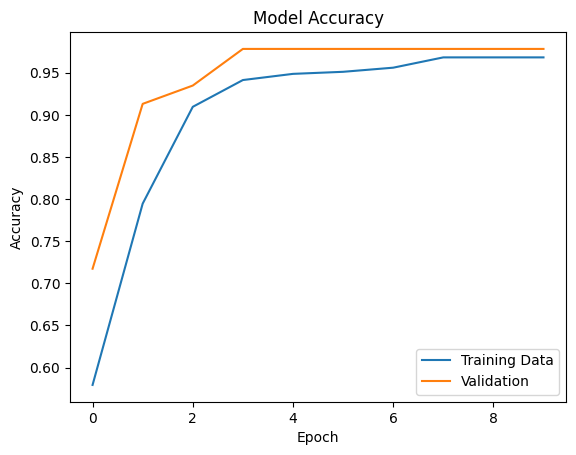

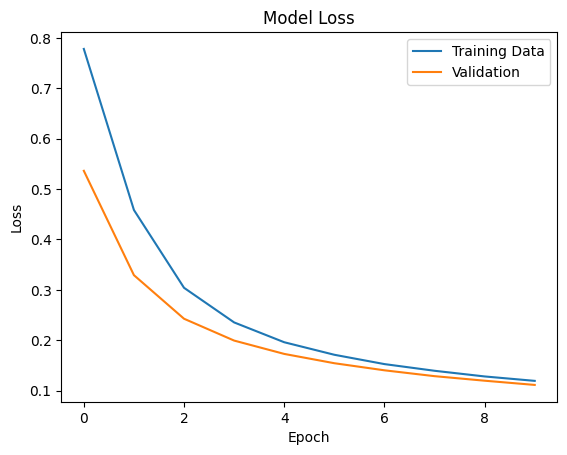

In [14]:
# Train the model and visualize training history
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training Data", "Validation"], loc="lower right")
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training Data", "Validation"], loc="upper right")
plt.show()

## Model Evaluation

The trained model is evaluated on the test set to calculate accuracy.


In [15]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 7ms/step - loss: 0.1169 - accuracy: 0.9649
0.9649122953414917


## Making Predictions

Sample input data is used to make predictions using the trained model.


In [16]:
# Make predictions on a sample input data
input_data = (9.173, 13.86, 59.2, 260.9, 0.07721, 0.08751, 0.05988, 0.0218, 0.2341, 0.06963, 0.4098, 
              2.265, 2.608, 23.52, 0.008738, 0.03938, 0.04312, 0.0156, 0.04192, 0.005822, 10.01, 
              19.23, 65.59, 310.1, 0.09836, 0.1678, 0.1397, 0.05087, 0.3282, 0.0849)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
input_data_std = scaler.transform(input_data_reshaped)
prediction = model.predict(input_data_std)
print(prediction)


1/1 [==============================] - 0s 62ms/step
[[0.08120302 0.9720335 ]]


c:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Interpretation of Prediction

The prediction is interpreted as either "Malignant" or "Benign" based on the predicted label.


In [17]:
# Interpret the prediction
prediction_label = [np.argmax(prediction)]
print(prediction_label)
if prediction_label[0] == 0:
    print("The Tumor is Malignant")
else:
    print("The Tumor is Benign")

[1]
The Tumor is Benign
